In [11]:
## ceci est l'importation et le chargement de la bibiothéque titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
## ceci est la configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# ceci est le chargement des données
df = pd.read_csv('train.csv')


In [7]:
# affichage des lignes
df.head()
print('informations sur les données')
df.info()
df.describe()

informations sur les données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# ceci est le calcul des valeurs manquantes
df.isnull().sum()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

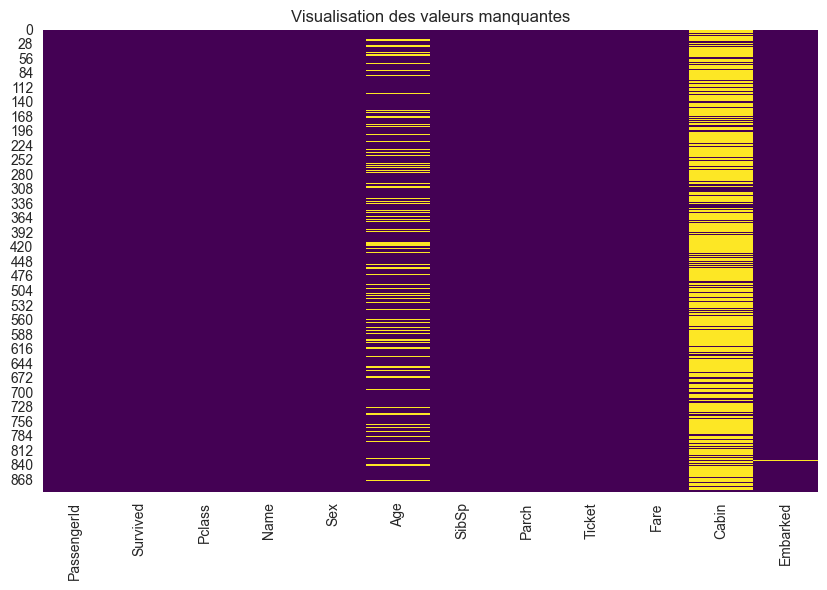

In [14]:
# ceci est la visualisation des valeurs manquantes
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisation des valeurs manquantes")
plt.show()

 Début de l'analyse exploratoire...
Taux de survie global : 38.4%
camenbert de survie


Text(0.5, 1.0, 'Répartition Survie vs Non-Survie')

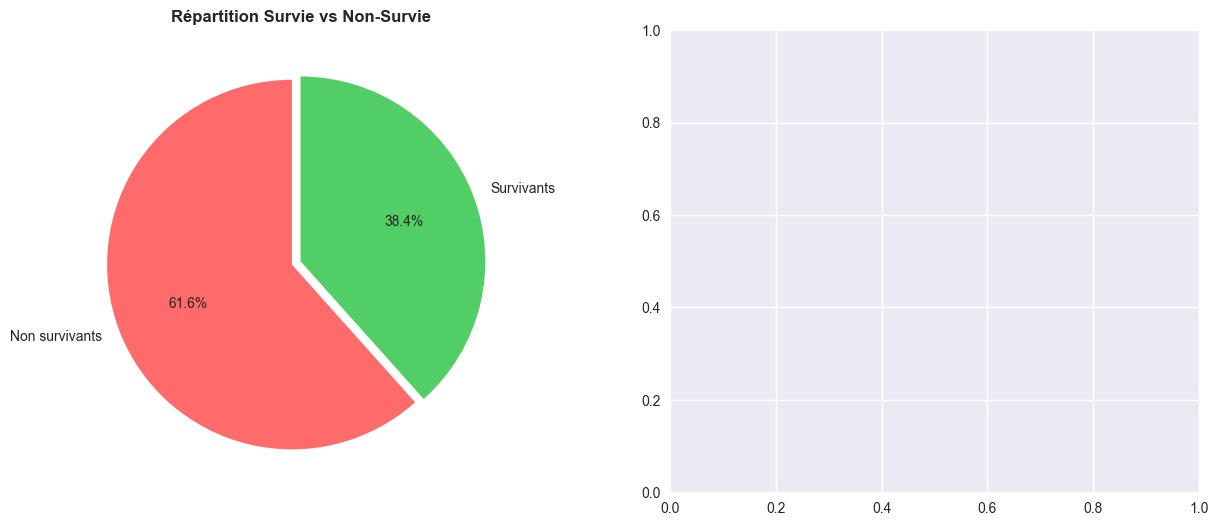

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
#configuration graphique
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
print(" Début de l'analyse exploratoire...")
# ceci est le taux de survi global
survival_rate = df['Survived'].mean() * 100
print(f"Taux de survie global : {survival_rate:.1f}%")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
print("camenbert de survie")
survival_counts = df['Survived'].value_counts()
labels = ['Non survivants', 'Survivants']
colors = ['#ff6b6b', '#51cf66']

axes[0].pie(survival_counts.values, labels=labels, autopct='%1.1f%%', 
           startangle=90, colors=colors, explode=(0.05, 0))
axes[0].set_title('Répartition Survie vs Non-Survie', fontweight='bold')

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/images/survival_by_gender.png'

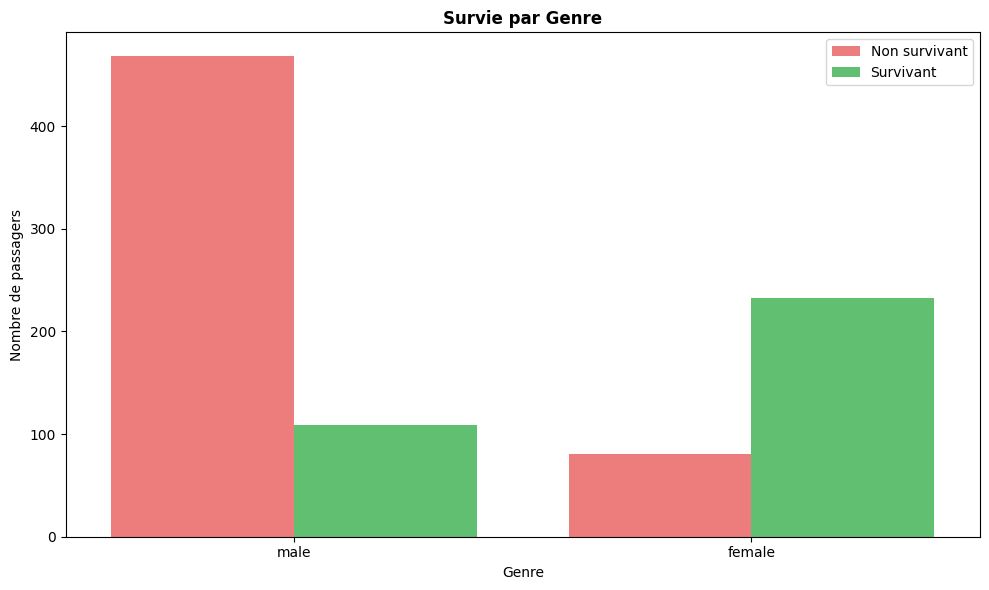

In [6]:
##ceci est la repartition des survivants par sexe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette=['#ff6b6b', '#51cf66'])
plt.title('Survie par Genre', fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Nombre de passagers')
plt.legend(['Non survivant', 'Survivant'])
plt.tight_layout()
plt.savefig('../outputs/images/survival_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

Graphiques sur l analyse de l'impact par classe
 Analyse des effectifs par classe :
Classe 1: 216 passagers (136 survivants)
Classe 2: 184 passagers (87 survivants)
Classe 3: 491 passagers (119 survivants)
📈 Taux de survie par classe : {1: 62.96296296296296, 2: 47.28260869565217, 3: 24.236252545824847}


FileNotFoundError: [Errno 2] No such file or directory: '../outputs/images/class_analysis.png'

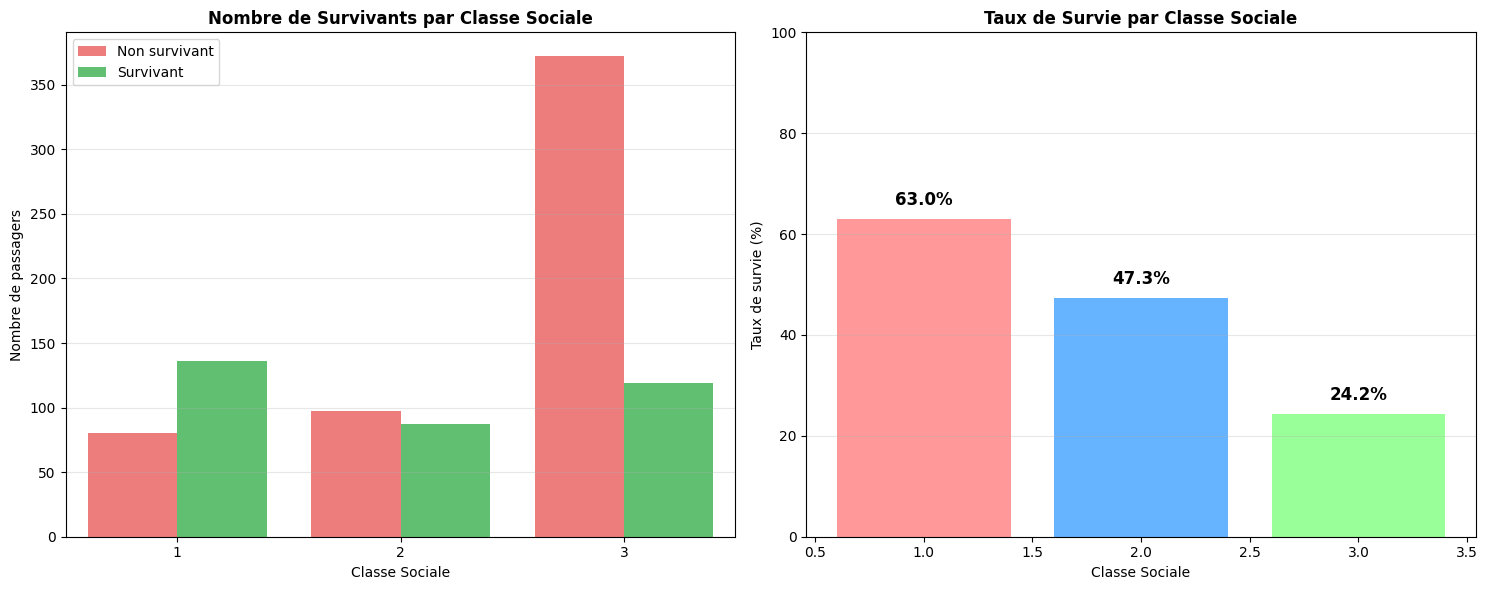

In [14]:
print("Graphiques sur l analyse de l'impact par classe")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Graphique 1: Nombre de survivants par classe
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0], palette=['#ff6b6b', '#51cf66'])
axes[0].set_title('Nombre de Survivants par Classe Sociale', fontweight='bold')
axes[0].set_xlabel('Classe Sociale')
axes[0].set_ylabel('Nombre de passagers')
axes[0].legend(['Non survivant', 'Survivant'])
axes[0].grid(axis='y', alpha=0.3)

print(" Analyse des effectifs par classe :")
for pclass in sorted(df['Pclass'].unique()):
    total = len(df[df['Pclass'] == pclass])
    survived = len(df[(df['Pclass'] == pclass) & (df['Survived'] == 1)])
    print(f"Classe {pclass}: {total} passagers ({survived} survivants)")
    # Graphique 2: Taux de survie par classe (en pourcentage)
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(f"📈 Taux de survie par classe : {survival_by_class.to_dict()}")

bars = axes[1].bar(survival_by_class.index, survival_by_class.values, 
                  color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1].set_title('Taux de Survie par Classe Sociale', fontweight='bold')
axes[1].set_xlabel('Classe Sociale')
axes[1].set_ylabel('Taux de survie (%)')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3)

# Ajouter les pourcentages sur les barres
for bar, rate in zip(bars, survival_by_class.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Finalisation
plt.tight_layout()
plt.savefig('../outputs/images/class_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
print("Différence entre les classes, , palette=['#ff6b6b', '#51cf66']")

for pclass in [1, 2, 3]:
    rate = df[df['Pclass'] == pclass]['Survived'].mean() * 100
    print(f"Classe {pclass}: {rate:.1f}% de survie")

# Calcul du ratio entre classe 1 et classe 3
rate_1 = df[df['Pclass'] == 1]['Survived'].mean()
rate_3 = df[df['Pclass'] == 3]['Survived'].mean()
ratio = rate_1 / rate_3 if rate_3 > 0 else float('inf')
print(f"\n Les passagers de 1ère classe avaient {ratio:.1f}x plus de chances de survivre que ceux de 3ème classe")

Différence entre les classes, , palette=['#ff6b6b', '#51cf66']
Classe 1: 63.0% de survie
Classe 2: 47.3% de survie
Classe 3: 24.2% de survie

 Les passagers de 1ère classe avaient 2.6x plus de chances de survivre que ceux de 3ème classe
